In [53]:
import pandas as pd
import numpy as np
df=pd.read_csv("football_data.csv")
df.drop(columns=[df.columns[0],df.columns[-1]],inplace=True)

In [54]:
req_cols=["ID","Preferred Foot","Weak Foot","Skill Moves","Work Rate",'Body Type', 'Real Face', 'Position', 'Height', 'Weight',
        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [82]:
temp_df=df[req_cols]
data=temp_df.values
ind=[]
for i in range(2):
    if(temp_df[req_cols[i]].isnull().values.any()):
        ind.extend(temp_df[temp_df[req_cols[i]].isnull()].index.to_list())

ind=list(set(ind))
temp_df=temp_df.drop(index=ind).reset_index()
temp_df.drop(columns="index",inplace=True)
# print(temp_df)
def cacl_height(x):
  # print(x)
  x=x.split("'")
  if(not(x[0].isnumeric())):
    return -1
  else:
    if(len(x)==1):
      return int(x[0])
  height=int(x[0])*12+int(x[1])
  return height


def calc_weight(x):
  x=x[:-3]
  if(not(x.isnumeric()) or len(x)==0):
    return -1
  return int(x)

def calc_pref(x):
  if(x.lower()!="right" and x.lower()!="left"):
    return -1
  return x.lower()

temp_df["Height"]=temp_df["Height"].apply(lambda x : cacl_height(x))
temp_df["Weight"]=temp_df["Weight"].apply(lambda x: calc_weight(x))
temp_df["Preferred Foot"]=temp_df["Preferred Foot"].apply(lambda x: calc_pref(x))
inc=[]
for i in range(len(temp_df)):
  if(temp_df["Height"][i]==-1 or temp_df["Weight"][i]==-1 or temp_df["Preferred Foot"][i]==-1):
    inc.append(i)

temp_df=temp_df.drop(index=inc).reset_index()
temp_df.drop(columns="index",inplace=True)

In [84]:
prefixes=[]
categorical=[]
data=temp_df.values
for i in range(data.shape[1]):
    if(type(data[0][i])==str):
        categorical.append(i)

for i in categorical:
    prefixes.append(req_cols[i])
    print(df[req_cols[i]].nunique(),req_cols[i])
    
df1=pd.get_dummies(temp_df,prefix=prefixes)
temp_df["Preferred Foot"].unique()
df1

30 Preferred Foot
13 Work Rate
17 Body Type
5 Real Face
28 Position


,ID,Weak Foot,Skill Moves,Height,Weight,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,158023,4.0,4.0,67,159,70.0,90.0,86.0,97.0,93.0,...,0,0,0,0,1,0,0,0,0,0
1,20801,4.0,5.0,74,183,89.0,81.0,87.0,88.0,81.0,...,0,0,0,0,0,0,0,0,0,1
2,190871,5.0,5.0,69,150,62.0,84.0,84.0,96.0,88.0,...,0,0,0,0,0,0,0,0,0,0
3,193080,3.0,1.0,76,168,21.0,50.0,13.0,18.0,21.0,...,0,0,0,0,0,0,0,0,0,0
4,192985,5.0,4.0,71,154,55.0,92.0,82.0,86.0,85.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18126,238813,2.0,2.0,69,134,40.0,49.0,25.0,42.0,30.0,...,0,0,0,0,0,0,0,0,0,0
18127,243165,2.0,2.0,75,170,52.0,43.0,36.0,39.0,32.0,...,0,0,0,0,0,0,0,0,0,1
18128,241638,3.0,2.0,68,148,46.0,38.0,38.0,45.0,38.0,...,0,0,0,0,0,0,0,0,0,1
18129,246268,3.0,2.0,70,154,39.0,42.0,40.0,51.0,34.0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
data=df1.values
from sklearn.metrics import silhouette_score
class KMeans:
    def __init__(self,num_clusters):
        self.num_clusters=num_clusters
    
    def fit(self,data):
        self.data=data
        ind=self.initialize_clusters()
        self.cluster_centres=self.data[ind]
        self.cluster_centres=self.cluster_centres[:,1:]
        self.cluster={i:[] for i in range(self.num_clusters)}
        self.compute_clusters()

    def initialize_clusters(self):
        init_clusters=np.random.choice(range(1,len(self.data)),self.num_clusters,replace=False)
        return init_clusters
    
    def dist(self,a,b):
        # print(sum(a-b)**2)
        return sum((a-b)**2)

    def compute_clusters(self):
        iter=1
  
        while(iter<=50):
            prev=self.cluster
            self.cluster={i:[] for i in range(self.num_clusters)}
            dist_matrix=pd.DataFrame()
            for i in range(len(self.cluster_centres)):
              dist_matrix[i]=np.apply_along_axis(lambda x: self.dist(x[1:],self.cluster_centres[i]),1,self.data)
          
            
            dist_matrix=dist_matrix.values
            cls=np.argmin(dist_matrix,axis=1)
            for i in range(len(cls)):
              self.cluster[cls[i]].append(i)

            if(prev==self.cluster or iter>50):
                break 

            self.recompute_cluster_centers()
            iter+=1
          
    def recompute_cluster_centers(self):
        for i in self.cluster:
            vals=self.data[self.cluster[i],1:]
            centroid=np.mean(vals,axis=0)
            self.cluster_centres[i]=centroid
    
    def predict(self,x):
      x=np.array(x)
      preds=pd.DataFrame()
      for i in range(len(self.cluster_centres)):
        preds[i]=np.apply_along_axis(lambda x: self.dist(x[1:],self.cluster_centres[i]),1,x)
      preds=preds.values
      cls=np.argmin(preds,axis=1)
      return cls
    
    def getScore(self):
      s=0
      for i in range(self.num_clusters):
        for j in range(len(self.cluster[i])):
          s+=self.dist(self.cluster_centres[i],self.data[self.cluster[i][j]][1:])
      return s
      


      


In [ ]:
scores=[]
models=[]
clust=[2,3,4,5,7]
for i in clust:
  clusterer=KMeans(i)
  clusterer.fit(data)
  models.append(clusterer)
  cluster_labels=clusterer.predict(data)

In [145]:
meandata=np.mean(data[:,1:],axis=0)
print(meandata.shape)
def dist(a,b):
  return sum((a-b)**2)
scores=[]
dist=np.apply_along_axis(lambda x: dist(x[1:],meandata),1,data)
loss_=[np.sum(dist)]
for i in range(len(models)):
  cluster_labels=models[i].predict(data)
  loss=models[i].getScore()
  loss_.append(loss)
  score=silhouette_score(data[:,1:],cluster_labels)
  scores.append(score)
  print(clust[i]," Clusters , score :",score,", Loss :",loss)

(86,)
2  Clusters , score : 0.5688364623316857 , Loss : 90196045.67704935
3  Clusters , score : 0.29969506150407926 , Loss : 66931052.33622625
4  Clusters , score : 0.2811399792829888 , Loss : 54458831.83602627
5  Clusters , score : 0.23182128498554713 , Loss : 50840390.96346453
7  Clusters , score : 0.2165343078572743 , Loss : 44209870.713410944


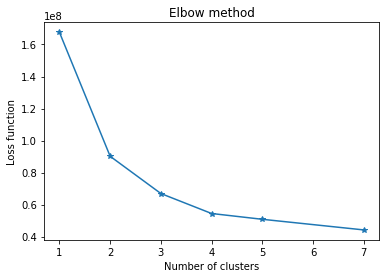

In [146]:
elbow_ind=clust.copy()
elbow_ind.insert(0,1)
import matplotlib.pyplot as plt
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Loss function")
plt.plot(elbow_ind,loss_,marker="*")


Text(0, 0.5, 'silhouette score')

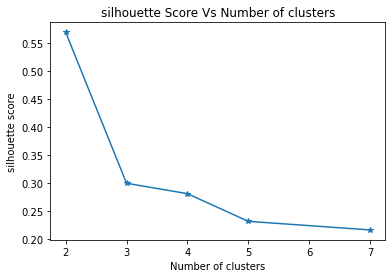

In [147]:
plt.plot(clust,scores,marker="*")
plt.title("silhouette Score Vs Number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("silhouette score")

In [148]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
clustering.fit_predict(data[:,1:])


array([0, 0, 0, ..., 0, 0, 0])